<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolas Herrera
- Nombre de alumno 2: Lucas Carrasco


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/vspartamo/MDS7202)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ('minmax', MinMaxScaler(), ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth'])
], remainder='passthrough').set_output(transform='pandas')

In [7]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', ct),
    ('xgb', XGBClassifier())
])

model.fit(X_train, y_train)

c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['Age', 'BMI', 'GenHlth',
                                                   'MentHlth', 'PhysHlth'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categoric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



2. **Respuestas**:
- Tiene métricas relativamente buenas. Puede ser útil para detectar posibles casos que podrían avanzar a una revisión más exhaustiva, pero no deberíamos poner mucha confianza en ellos, ya que todas las métricas están alrededor del 75%.
- Las métricas permiten explicar que tan bueno es el modelo prediciendo la variable objetivo, en particular, de todas las personas que tienen diabetes cuantas de ellas fueron correctamente clasificadas como diabéticas, de todas las personas predichas como diabéticas cuantas de ellas realmente tienen diabetes, entre otras.
- No, las métricas utilizadas no permiten asegurar que el modelo elija buenas features, estas solo dan una vista super por encima de la capacidad predictiva del modelo.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [9]:
xgb_trained = model.named_steps['xgb']
feature_importance_weight = xgb_trained.get_booster().get_score(importance_type="weight")
weight_importance_df = pd.DataFrame(feature_importance_weight.items(), columns=['Feature', 'Weight'])
feature_importance_gain = xgb_trained.get_booster().get_score(importance_type="gain")
gain_importance_df = pd.DataFrame(feature_importance_gain.items(), columns=['Feature', 'Gain'])
feature_importance_cover = xgb_trained.get_booster().get_score(importance_type="cover")
cover_importance_df = pd.DataFrame(feature_importance_cover.items(), columns=['Feature', 'Cover'])

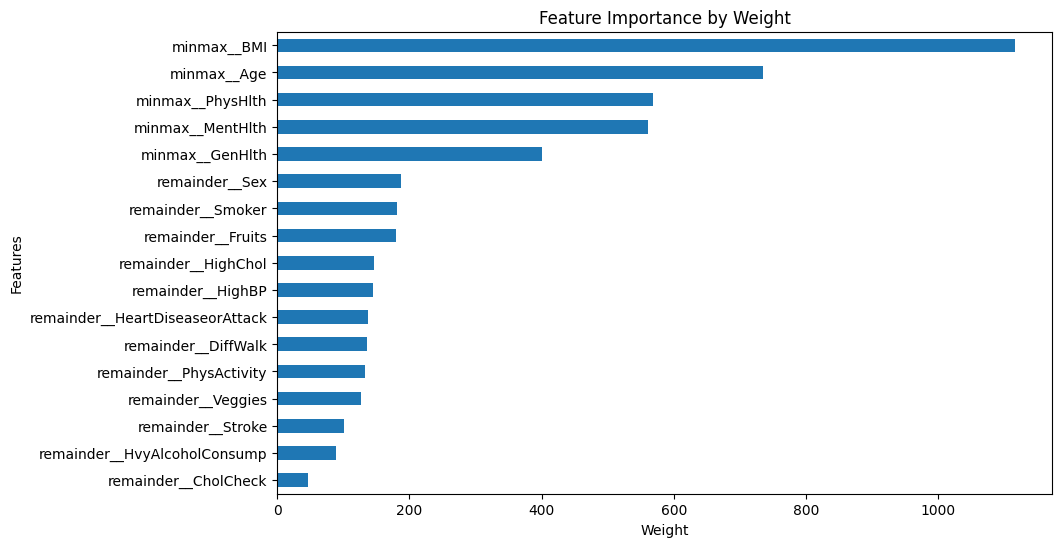

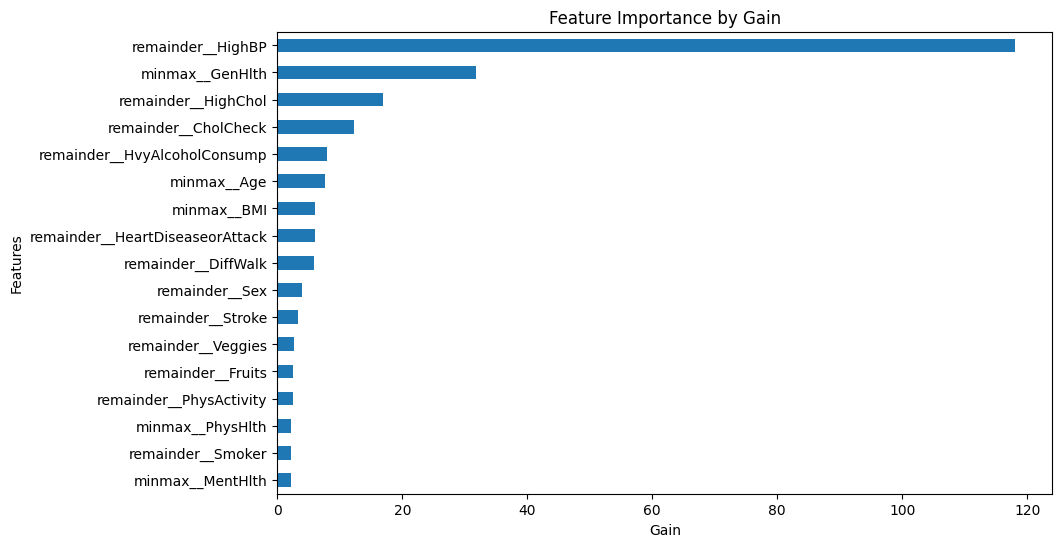

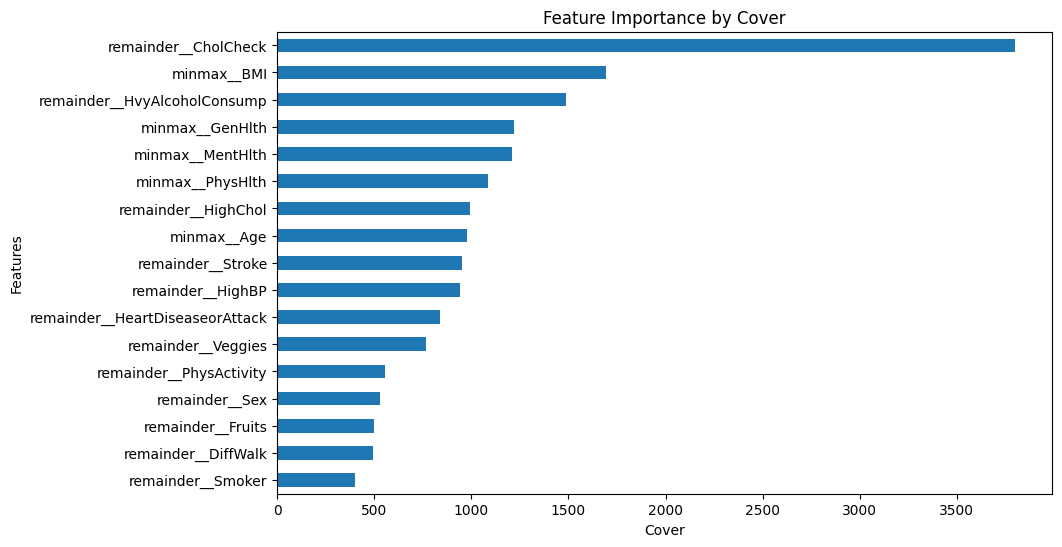

In [10]:
import matplotlib.pyplot as plt

def plot_importance(df, title, type_of_feature):
    df = df.sort_values(by=type_of_feature, ascending=True)
    df.plot(kind='barh', x='Feature', y=type_of_feature, legend=False, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(type_of_feature)
    plt.ylabel('Features')
    plt.show()
    
plot_importance(weight_importance_df, 'Feature Importance by Weight', "Weight")
plot_importance(gain_importance_df, 'Feature Importance by Gain', 'Gain')
plot_importance(cover_importance_df, 'Feature Importance by Cover', 'Cover')

**RESPUESTAS**:

2. Para ver esto notemos que la feature más importante en cada método es diferente. Según Weight es el BMI, según Gain es HighBP, y según Cover es ColCheck, lo que indica que no existe una igualdad de la feature más importante entre todos los métodos. Esto es muy normal, dado que cada uno de los métodos verifica un aspecto distinto de la importancia de las features, por lo que es normal que no coincidan. Sin embargo, es de notar que esto tiene un lado muy positivo, ya que al tener métodos que miden desde distintos puntos de vista la importancia de una feature, al observarlos todos podemos ver cuales son los atributos mejor rankeados en cada uno por separado, como sería el caso de quizás BMI, que está bastante alto en los 3.

3. No, las importancias no son suficientes para obtener una visión completa de la interpretabilidad del modelo que utiliza árboles, ya que no se tiene una visión completa de cómo se comporta el modelo respecto a las interacciones entre las variables. En particular, la mayor debilidad de estos métodos recae en que se tiene a privilegiar o dar más importancia a variables que tengan un espacio más grande de opciones, ya que al tener más opciones, se puede dividir en más partes, por lo que estas importancias podrían darle más peso a variables que no son tan importantes.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [11]:
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)
feature_names = X_test_transformed.columns  # Obtiene los nombres después de la transformación

In [12]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

perm_importance_df = perm_importance_df.sort_values(by='Importance Mean', ascending=False)

perm_importance_df

,Feature,Importance Mean,Importance Std
11,remainder__Fruits,0.056541,0.002762
4,minmax__PhysHlth,0.033060,0.002184
0,minmax__Age,0.027647,0.002124
16,remainder__HighBP,0.015732,0.001431
2,minmax__GenHlth,0.011307,0.001565
10,remainder__PhysActivity,0.004345,0.000771
6,remainder__HighChol,0.004260,0.000807
3,minmax__MentHlth,0.003751,0.000530
14,remainder__DiffWalk,0.003692,0.001002
1,minmax__BMI,0.002850,0.001150


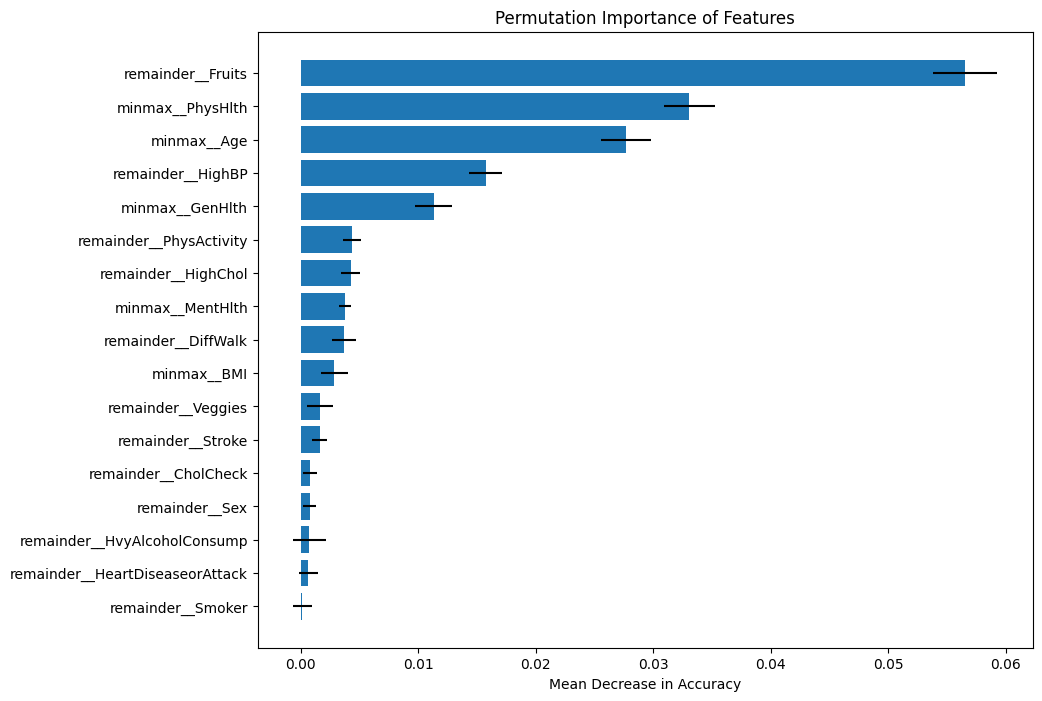

In [13]:
import matplotlib.pyplot as plt

perm_importance_df = perm_importance_df.sort_values(by='Importance Mean', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance Mean'], xerr=perm_importance_df['Importance Std'])
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Importance of Features')
plt.show()


4. **Respuestas**:
- La importancia de las características en mi propuesta se mide mediante la permutación de los valores de cada característica y la evaluación de la disminución en la precisión del modelo. Es decir, se mide cuánto disminuye la precisión del modelo cuando se desordena una característica específica, lo que indica la importancia de esa característica para el modelo.
- Las cinco características con mayor impacto en la salida del modelo son: `remainder__Fruits`, `minmax__PhysHlth`, `minmax__Age`, `remainder__HighBP` y `minmax__GenHlth`. Estas características tienen sentido ya que la salud física y mental, la edad, la presión arterial alta y el consumo de frutas son factores conocidos que afectan la diabetes.
- Las conclusiones cambian con respecto a las importancias de las características del punto anterior, ya que la permutación proporciona una visión más robusta y menos sesgada de la importancia de las características, considerando la interacción entre las características.
- Ventajas del método de permutación:
    1. Proporciona una medida directa de la importancia de las características basada en la precisión del modelo.
    2. Considera la interacción entre las características.
    3. Es aplicable a cualquier modelo de machine learning.

    Desventajas del método de permutación:
    1. Es computacionalmente costoso, especialmente para grandes conjuntos de datos.
    2. Puede ser sensible al ruido en los datos.
    3. No proporciona información sobre la dirección del efecto de las características (positivo o negativo).


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [14]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [15]:
import shap

explainer = shap.Explainer(model.named_steps['xgb'], X_test_transformed)

shap_values = explainer(X_test_transformed)
shap_values[0]

100%|===================| 14095/14139 [02:26<00:00]        

.values =
array([ 0.2658038 , -0.59128203,  1.13348881,  0.03118654,  0.1315737 ,
       -0.10939739,  0.3300897 ,  0.        , -0.02481637, -0.05345311,
       -0.00147622,  0.02107443, -0.01397414,  0.02728401, -0.05096033,
       -0.01026525, -0.39964577])

.base_values =
-0.11932307362260375

.data =
array([0.75      , 0.12790698, 0.75      , 0.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        ])

**RESPUESTA**:

2. Los valores retornados por SHAP son los SHAP values, y representan cuánto contribuye cada cada feature a la predicción del modelo para ese caso especifico. 
3. En particular, si el shap value es positivo, significa que este aporta mucho a que la predicción del modelo suba, mientras que si es negativo, contirbuye negativamente a la predicción, osea, hace que el valor estimado sea menor. Esto último lo podemos ver en el calculo del estimador, donde este se puede obtener con la suma del valor base más la suma de los shap values por los features.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

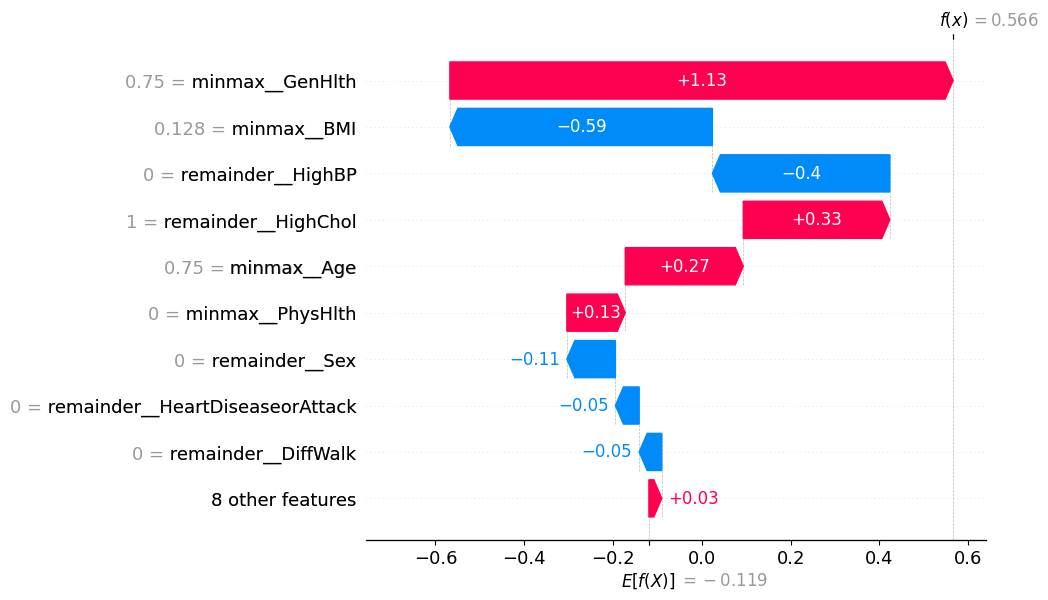

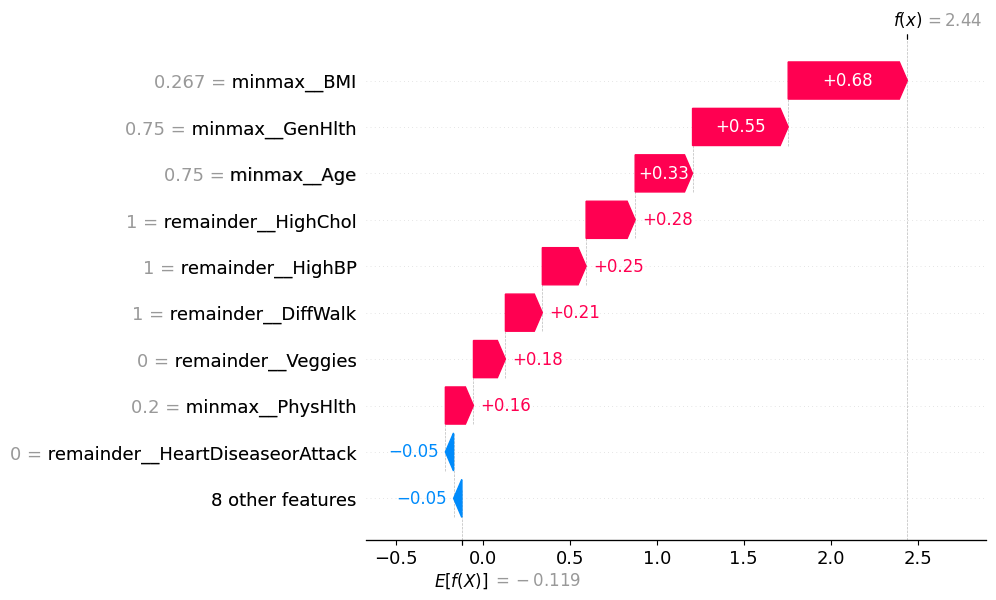

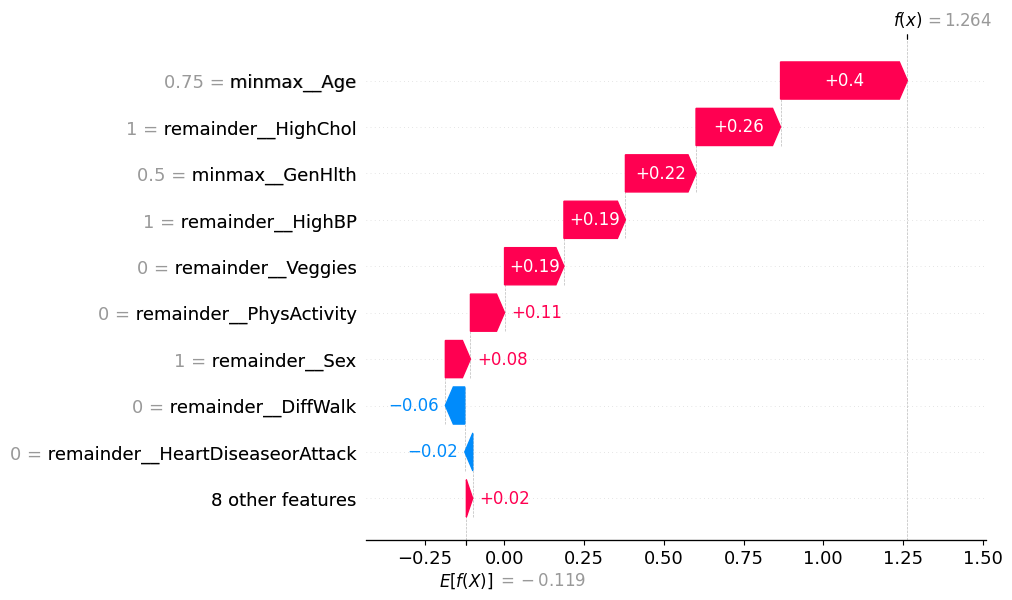

In [16]:
# Plot the SHAP values for the first instance
shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[8])
shap.plots.waterfall(shap_values[149])

En los gráficos presentados, se tiene que los valores en rojo muestran variables que aumentan la magnitud del valor predicho, es decir, que hacen más probable tener diabetes, recipricamente para las variables en azul. La primera instancia se tiene que la variable 'minmax_GenHlth' tiene un valor positivo $+1.13$, que quiere decir que cuando esta toma el valor 0.75, aumenta el valor predicho en 1.13, también aumentan la probabilidad de tener diabetes las variables 'remainder_highcol', 'minmax_age', 'minmax_PhysHlth' y las demás features no especificadas ya que no aportan en gran medida. Por otra parte, las que aportan negativamente al valor predicho, son 'minmax_BMI', 'remainder_HighBP' y en menor medida 'remainder_Sex', 'remainder_HeartDiseaseorAttack' y 'remainder_DiffWalk'.

En la segunda instancia, se tiene que sólo la variable 'remainder_HeartDiseaseorAttack' disminuye a la probabilidad de tener diabetes de manera no despreciable individualmente, mientras que otras 8 features disminuyen la probabilidad en la misma medida que la anterior


En la tercera instancia, se tiene que las características que aportan positivamente a la predicción son 'minmax_Age', 'remainder_HighChol', 'minmax_GenHlth', 'remainder_HighBP', 'remainder_Veggies', 'remainder_PhysActivty', 'remainder_Sex' y con aportande en menor medida, un conjunto de otras 8 variables no especficadas en el gráfico, en este caso, solo 'remainderDiffWalk' y 'remainderHeartDiseaseorAttack' aportan negativamente a la probabilidad de presentar diabetes, ambas en una escala relativamente baja.


Para responder si existe algún patrón entre las instancias analizadas, notemos que hay variables que no muestran un comportamiento uniforme en los tres gráficos pero sí mantienen cierta tendencia a aumentar o disminuir la predicción, un ejemplo de ello es minmax_GenGlth que en todas las instancias aumenta el valor de la predicción, pero  lo hace en proporciones muy diferentes en cada caso y puede estar sesgado ya que tanto en la segunda como tercera instancia graficada, abundan las variables que tienden a aumentar la magnitud del valor predicho, lo que mitiga la idea de que se presente un patrón claro respecto a esta variable. Por otro lado, se observa que minmaxAge en las tres instancias se mantiene al rededor de $+0.35$, remainder_PhysActivity se mantiene al rededor de $+0.14$, remainder_HighChol mantiene valores centrados en $+0.30$; siendo estas variables que hacen sentido en el contexto del problema y la interpretabilidad que se obtiene de los gráficos. Es decir, se observa como patrón que la actividad física, la edad y, en estas instancias, minmax_GenHlt, son variables que aumentan la probabilidad retornada por los modelos.

Estas conclusiones no es posible generalizarlas, se observa que ya en sólo tres instancias hay variables que parecieran aportar positivamente a la predicción en cierta isntancia pero hacen lo contrario en otras y viceversa, por lo que se debe comprender más a profundidad sus implicaciones en el modelo y contexto del problema. 

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

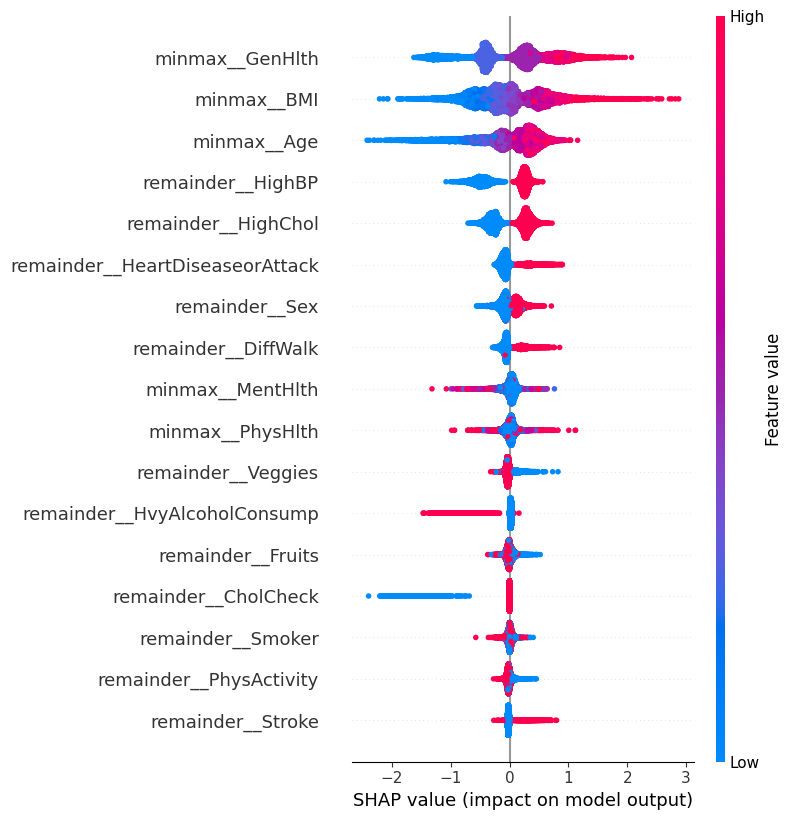

In [17]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed)

Del gráfico se tiene que las variables que más afectan los valores de la predicción final están ordenados de mayor a menor importancia verticalmente (arriba las que más afectan, abajo las de menos impacto), por lo que las características que más afectan la predicción son 'minmax_GenHlt', 'minmax_BMI' y 'minmax_Age', lo que no es concordante del todo con el análisis anteriormente hecho, donde no se mencionó que 'minmax_BMI' fuera de las que pareciera influir más en la predicción final. Por otra parte, las otras dos características se mencionaron anteriormente e indica que pese a ser pocas instancias las analizadas, pudieron mostrar un indicio de un comportamiento más global. El caso inverso también es cierto, de variables que se consideró relevantes y que globalmente no afectan en gran medida, como es el caso de 'minmax_PhysHlt' , que acorde al contexto del problema se pudo haber pensado que debiese estar más arriba pero en la globalidad es medianamente importante al valor final.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

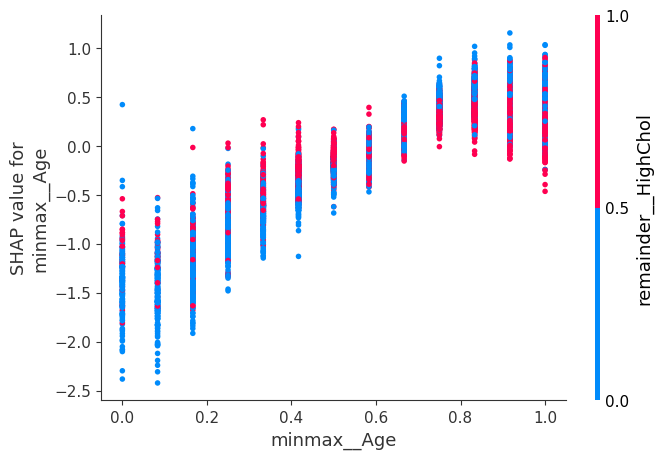

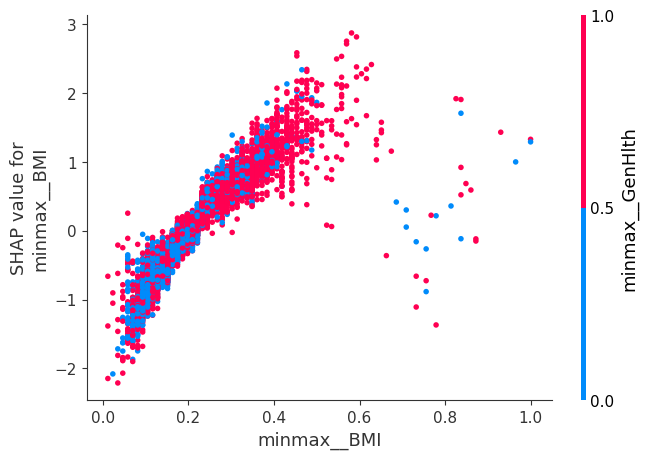

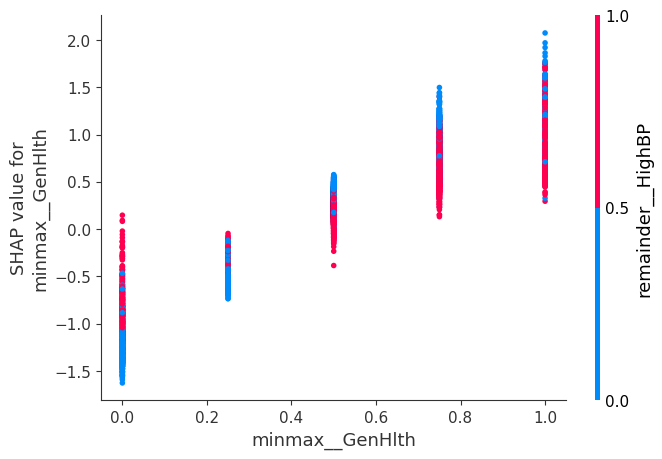

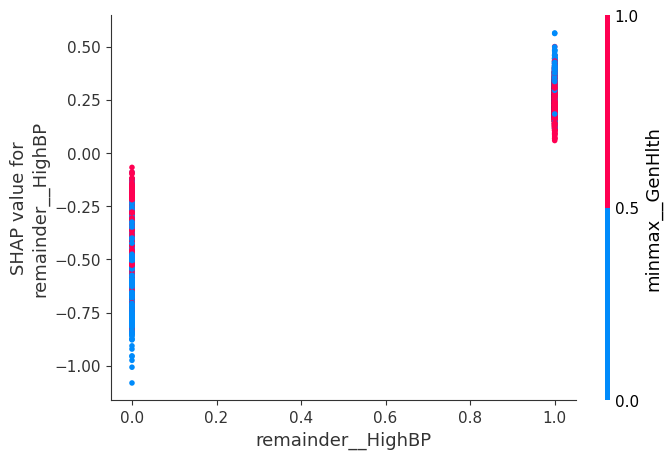

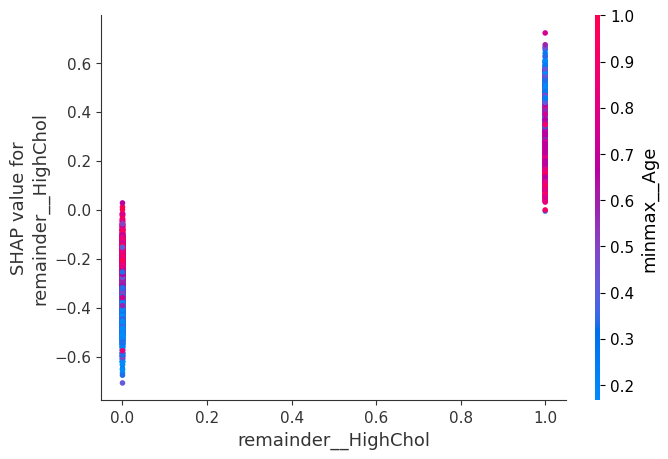

In [19]:
shap.dependence_plot('minmax__Age', shap_values.values, X_test_transformed)
shap.dependence_plot('minmax__BMI', shap_values.values, X_test_transformed)
shap.dependence_plot('minmax__GenHlth', shap_values.values, X_test_transformed)
shap.dependence_plot('remainder__HighBP', shap_values.values, X_test_transformed)
shap.dependence_plot('remainder__HighChol', shap_values.values, X_test_transformed)

De los gráficos anteriormente mostrados, se observa que la edad avanzada y el colesterol alto son factores que el moodelo asocia con un alto riesgo de diabetes, 
el BMI alto y la mala salud general son predictores importantes de diabetes en el modelo, con contribuciones positivas a la probabilidad de desarrollar la enfermedad. La presión arterial alta también es un factor significativo, especialmente cuando se combina con una mala salud general o un alto BMI. Tanto la presión arterial alta como el colesterol alto son factores de riesgo moderados en este modelo para predecir la diabetes, pero su impacto no es tan fuerte como el de otras variables, como el BMI o la salud general. La combinación de presión arterial alta y mala salud general, o de colesterol alto y mayor edad, parece tener una leve influencia en el aumento de la predicción de diabetes, aunque esta influencia es sutil comparada con otras variables, por lo que se puede concluir que según estos gráficos al aumentar la edad, el colesterol, el BMI (en ciertos intervalos) y una mala salud en general, aumenta fuertemente la probabilidad de tener diabetes, es decir, son factores de riesgo.


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

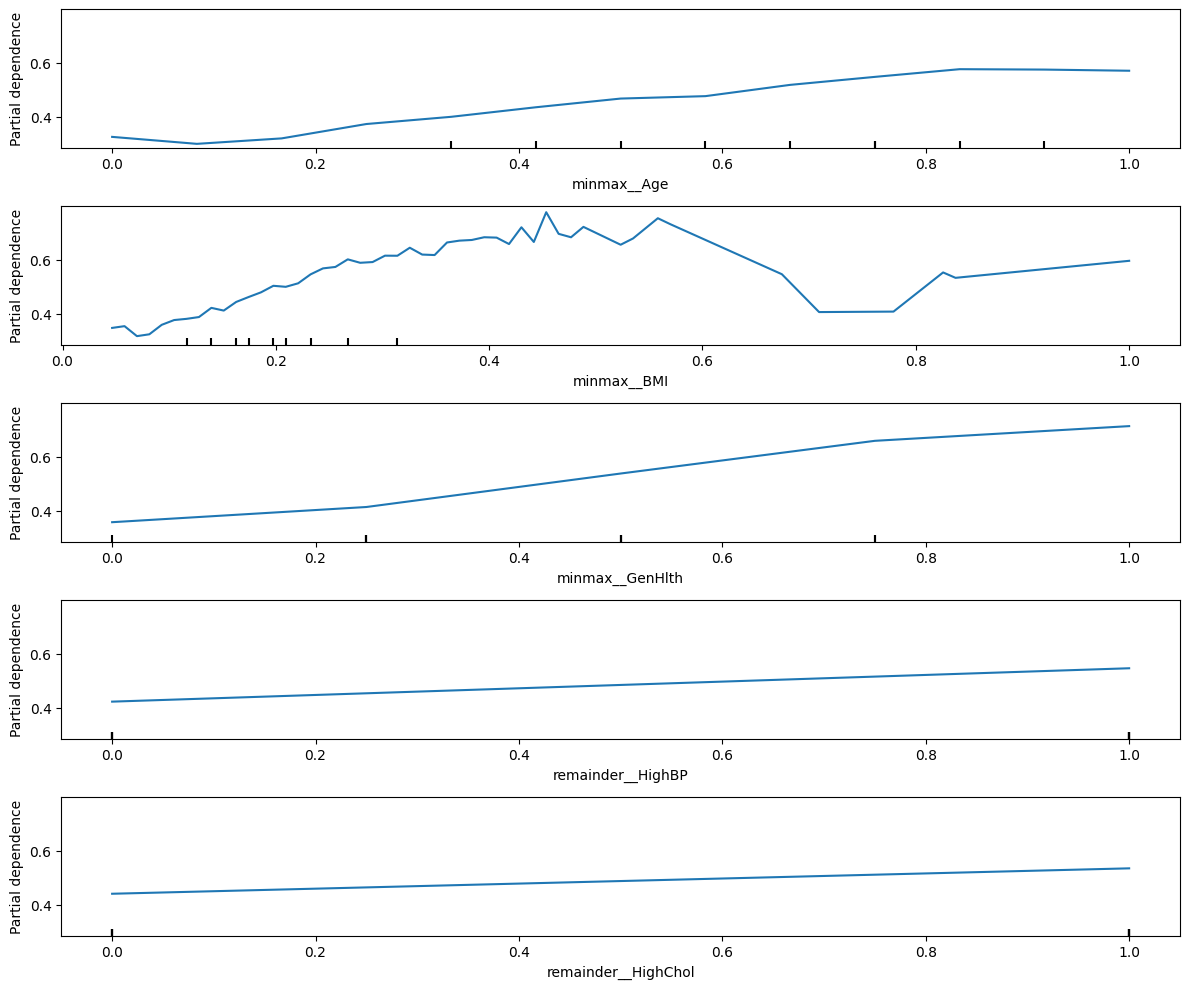

In [21]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Selecciona una submuestra de 1000 observaciones
X_test_sampled = X_test_transformed.sample(n=1000, random_state=42)
# Variables a analizar en el PDP

features_to_plot = ['minmax__Age', 'minmax__BMI', 'minmax__GenHlth', 'remainder__HighBP', 'remainder__HighChol']

# Generar y mostrar los gráficos PDP
fig, ax = plt.subplots(figsize=(12, 10), nrows=5, ncols=1)

# Graficar los PDPs
PartialDependenceDisplay.from_estimator(
    model.named_steps['xgb'],
    X_test_sampled,
    features=features_to_plot,
    feature_names=feature_names,
    ax=ax
)

plt.tight_layout()
plt.show()


Variables como minmax__Age y minmax__GenHlth muestran una relación positiva y consistente con la salida del modelo, indicando que la edad avanzada y una salud general deteriorada están estrechamente asociadas con un mayor riesgo de diabetes. Por otro lado, minmax__BMI presenta una influencia compleja y no lineal, mientras que HighBP y HighChol tienen un impacto positivo leve, sugiriendo que su presencia contribuye a una mayor probabilidad de diabetes, aunque no de manera tan pronunciada como la edad o la salud general.El tamaño de la muestra puede ser representativo de las tendencias generales del modelo, en especial para los casos en que el comportamiento se muestra uniforme, pero no tanto para casos más sintomáticos o complejos como el BMI, que puede variar en general acorde a la distribución y/o variabilidad de toda la data, por lo que para esta variable, no es tan rápido el asegurar que todos los datos se comportan de una manera similar.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [45]:
!pip install alibi


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from alibi.explainers import AnchorTabular

In [50]:
# Inserte su código para generar sistema de reglas aquí
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)
clf = model.named_steps['xgb']

explainer = AnchorTabular(clf.predict, feature_names=feature_names)
explainer.fit(X_train_transformed.to_numpy())

idx = 1000
# explicar predicción idx 1000
obs = np.array(X_test_transformed.iloc[idx], ndmin = 2)
explanation = explainer.explain(obs, threshold=0.9) # generar anchor
print("RULE FOR PREDICTION 1000")
print('Prediction: ', explainer.predictor(X_test_transformed.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('')


idx = 3001
# explicar predicción idx 3001
obs = np.array(X_test_transformed.iloc[idx], ndmin = 2)
explanation = explainer.explain(obs, threshold=0.9) # generar anchor
print("RULE FOR PREDICTION 3001")
print('Prediction: ', explainer.predictor(X_test_transformed.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('')

idx = 5751
# explicar predicción idx 5751
obs = np.array(X_test_transformed.iloc[idx], ndmin = 2)
explanation = explainer.explain(obs, threshold=0.9) # generar anchor
print("RULE FOR PREDICTION 5751")
print('Prediction: ', explainer.predictor(X_test_transformed.to_numpy()[idx].reshape(1, -1))[0])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

RULE FOR PREDICTION 1000
Prediction:  1
Anchor: minmax__Age > 0.83 AND remainder__HeartDiseaseorAttack > 0.00
Precision: 0.91
Coverage: 0.04

RULE FOR PREDICTION 3001
Prediction:  1
Anchor: minmax__BMI > 0.24 AND remainder__HighBP > 0.00
Precision: 0.93
Coverage: 0.18

RULE FOR PREDICTION 5751
Prediction:  0
Anchor: minmax__GenHlth <= 0.25 AND remainder__HighBP <= 0.00
Precision: 0.92
Coverage: 0.24


**RESPUESTAS**:

La regla propuesta para la observación de indice 1000 es valida para el 4% de la población, y sobre ese 4% va a estar correcta el 91% de las veces. Luego la regla de la observación de indice 3001 es valida para el 18% de la población con un 93% sobre ese subgrupo. Finalmente la regla de la observación de indice 5751 es valida para el 24% de la población con un 92% de precisión sobre ese subgrupo. 

En general, las reglas propuestas tienen sentido, ya que son reglas que se basan en las características más importantes encontradas en los análisis globales de importancia, como por ejemplo minmax_Age, o remainder_HighBP que están dentro de las 4 más importantes en los análisis globales. De esta forma, los análisis locales y globales se complementan, y tienen sentido en conjunto, ya que las reglas propuestas se basan en las características más importantes del modelo.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

**RESPUESTA**:

En el caso de clasificación de diabetes tanto las explicaciones globales como las locales son muy importantes. En el caso de las locales, es muy útil en particular que vieramos la técnica de permutación, ya que esta nos permite incluir información sobre la interacción entre variables para realizar la explicación global, además de que algunas de sus desventajas están ligadas al alto costo computacional de evaluar esto, pero que en este caso que no se tienen demasiados atributos puede ser muy útil. Por otro lado, en el caso de las explicaciones locales, es muy útil que veamos SHAP, ya que este nos permite ver como se comporta el modelo para cada observación, y en particular decirnos como interactua cada variable sobre la predicción del modelo, y así entender caso a caso lo que está ocurriendo, que en particular es super útil para explicar casos de pacientes especificos.

Luego viendo en general el caso del Dr. Simi, los métodos locales pueden tener una relevancia un poco mayor para atender casos especificos del modelo. Es posible que haya que dar explicación a casos especificos, por ejemplo, de por qué a una persona que tenía diabetes, se le diagnostico que no tenía, por lo que una explicación local en ese caso es de vital importancia. Sin embargo, los métodos globales también son importantes y no se deberían dejar de lado por completo, ya que comprender el comportamiento general del modelo es siempre importante, aunque aquí podría privilegiarse un poco más los métodos locales.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>